In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("covid_19_data.csv")

print("Data Loaded Successfully!")
print(df.head())

print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())


print("\n--- Basic Statistics ---")
print(df.describe())

Data Loaded Successfully!
        Date State       Region  Confirmed  Deaths  Recovered
0  4/29/2020   NaN  Afghanistan       1939      60        252
1  4/29/2020   NaN      Albania        766      30        455
2  4/29/2020   NaN      Algeria       3848     444       1702
3  4/29/2020   NaN      Andorra        743      42        423
4  4/29/2020   NaN       Angola         27       2          7

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321 entries, 0 to 320
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       321 non-null    object
 1   State      140 non-null    object
 2   Region     321 non-null    object
 3   Confirmed  321 non-null    int64 
 4   Deaths     321 non-null    int64 
 5   Recovered  321 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 15.2+ KB
None

--- Missing Values ---
Date           0
State        181
Region         0
Confirmed      0
Deaths         0

In [35]:
df.fillna(0, inplace=True)

df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

In [36]:
country_cases = df.groupby('region')['confirmed'].sum().sort_values(ascending=False)


print("\n--- Top 10 Countries by Confirmed Cases ---")
print(country_cases.head(10))


--- Top 10 Countries by Confirmed Cases ---
region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Name: confirmed, dtype: int64


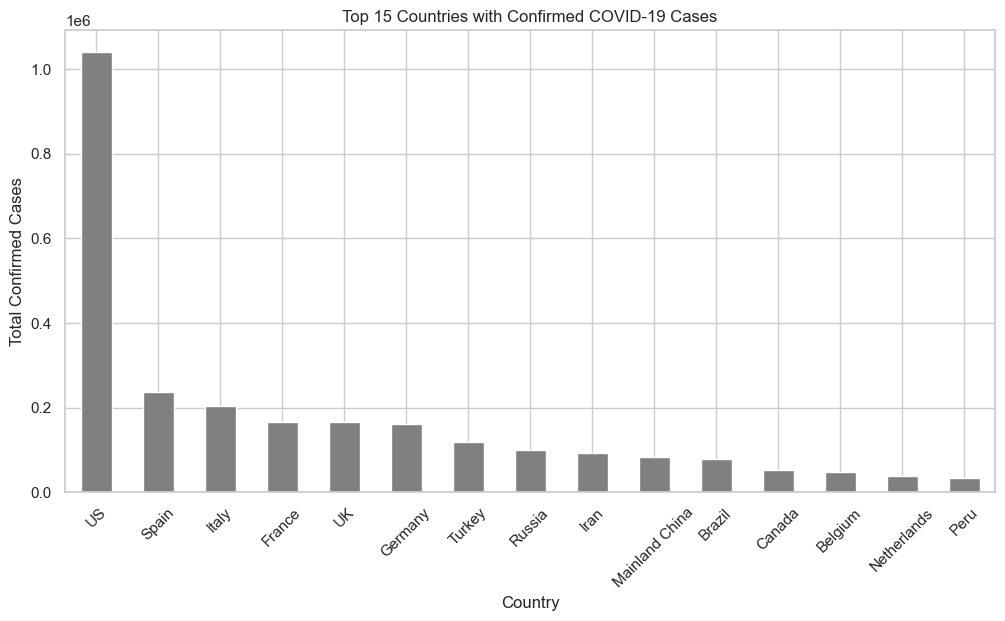

In [37]:
plt.figure(figsize=(12,6))
country_cases.head(15).plot(kind='bar', color='grey')
plt.title("Top 15 Countries with Confirmed COVID-19 Cases")
plt.ylabel("Total Confirmed Cases")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

                confirmed  deaths  recovered
region                                      
US                1039909   60967     120720
Spain              236899   24275     132929
Italy              203591   27682      71252
France             166543   24121      49118
UK                 166441   26166        857
Germany            161539    6467     120400
Turkey             117589    3081      44040
Russia              99399     972      10286
Iran                93657    5957      73791
Mainland China      82862    4633      77610


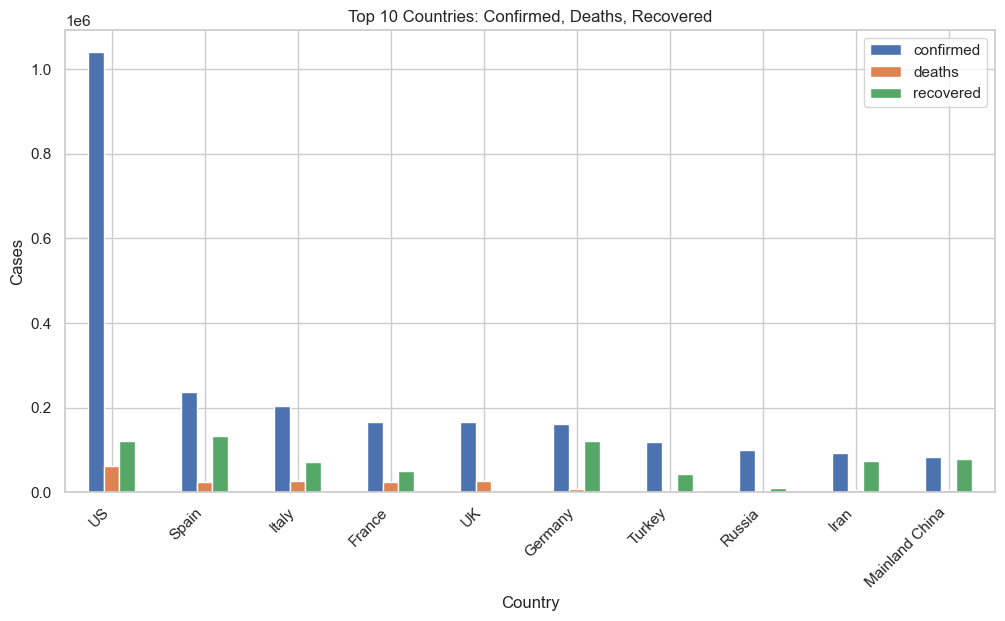

In [38]:
country_stats = df.groupby('region')[['confirmed','deaths','recovered']].sum().sort_values(by='confirmed', ascending=False).head(10)

print(country_stats)

country_stats.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries: Confirmed, Deaths, Recovered")
plt.ylabel("Cases")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.show()

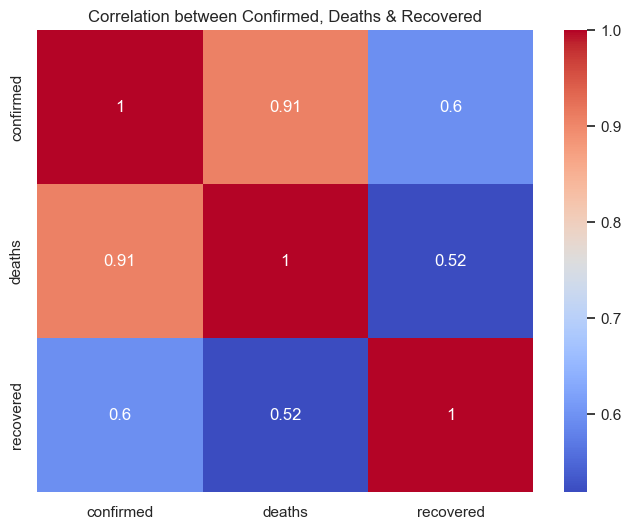

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['confirmed','deaths','recovered']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Confirmed, Deaths & Recovered")
plt.show()


--- Applying K-Means Clustering ---

Cluster distribution (k=4):
Cluster
0    291
3     20
2      5
1      5
Name: count, dtype: int64

--- Visualizing the Clusters ---


C:\Users\Okayp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


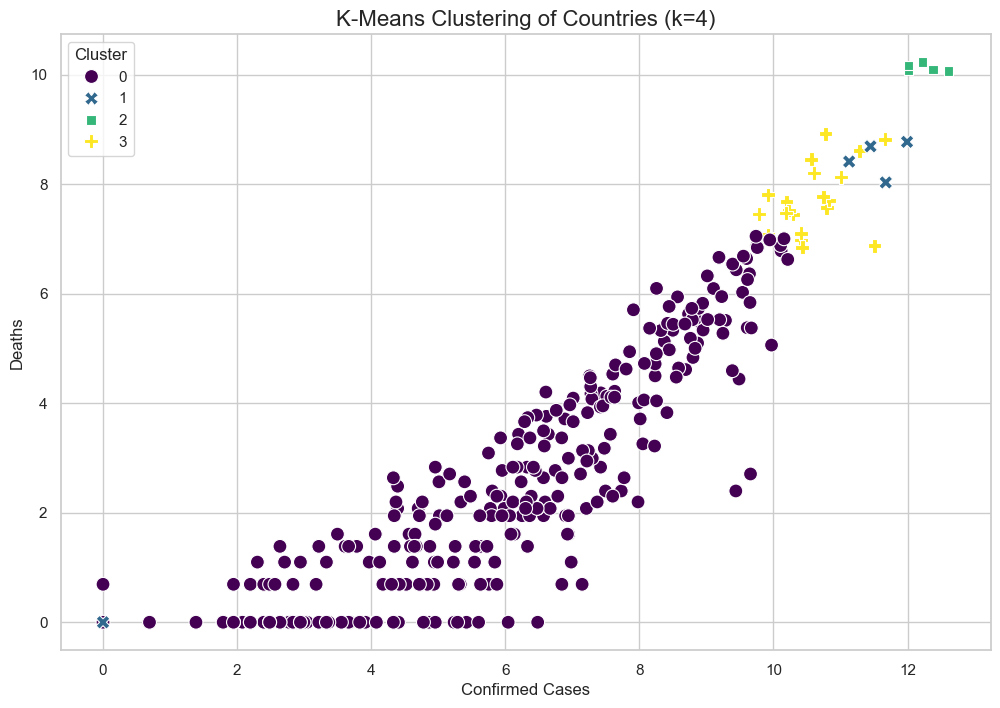

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


df.dropna(subset=['region'], inplace=True)
features = ['confirmed', 'deaths', 'recovered']
df_ml = df[features].copy()

print("\n--- Applying K-Means Clustering ---")

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_ml)

n_clusters =4
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(df_scaled)

print(f"\nCluster distribution (k={n_clusters}):")
print(df['Cluster'].value_counts())


print("\n--- Visualizing the Clusters ---")
df['Confirmed_log'] = np.log1p(df['confirmed'])
df['Deaths_log'] = np.log1p(df['deaths'])

# Creating a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Confirmed_log', y='Deaths_log', hue='Cluster', data=df, palette='viridis', style='Cluster', s=100)
plt.title(f'K-Means Clustering of Countries (k={n_clusters})', fontsize=16)
plt.xlabel('Confirmed Cases', fontsize=12)
plt.ylabel('Deaths', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [45]:
df.rename(columns={'State': 'Province/State', 'Region': 'Country/Region'}, inplace=True)
df['Province/State'] = df['Province/State'].fillna(df['Country/Region'])
df['Date'] = pd.to_datetime(df['Date'])

#--- Insights ---
print("\n--- Insights ---")

country_summary = df.groupby('Country/Region').agg(
    Confirmed=('Confirmed', 'sum'),
    Deaths=('Deaths', 'sum'),
    Recovered=('Recovered', 'sum')
).reset_index()

country_summary['Mortality Rate (%)'] = (country_summary['Deaths'] / country_summary['Confirmed']) * 100
country_summary['Recovery Rate (%)'] = (country_summary['Recovered'] / country_summary['Confirmed']) * 100

print("\n--- Top Countries by Confirmed Cases ---")
top_confirmed = country_summary.sort_values(by='Confirmed', ascending=False).head(10)
print(top_confirmed.to_string())

print("\n--- Top Countries by Recovered Cases ---")
top_recovered = country_summary.sort_values(by='Recovered', ascending=False).head(10)
print(top_recovered.to_string())

print("\n--- A Detailed Look at a Specific Country (e.g., US) ---")
us_data = df[df['Country/Region'] == 'US']
print(us_data[['Date', 'Province/State', 'Confirmed', 'Deaths', 'Recovered']].tail())


--- Insights ---

--- Top Countries by Confirmed Cases ---
     Country/Region  Confirmed  Deaths  Recovered  Mortality Rate (%)  Recovery Rate (%)
174              US    1039909   60967     120720            5.862725          11.608708
158           Spain     236899   24275     132929           10.246983          56.112098
83            Italy     203591   27682      71252           13.596868          34.997618
59           France     166543   24121      49118           14.483347          29.492684
173              UK     166441   26166        857           15.720886           0.514897
63          Germany     161539    6467     120400            4.003368          74.533085
172          Turkey     117589    3081      44040            2.620143          37.452483
139          Russia      99399     972      10286            0.977877          10.348193
79             Iran      93657    5957      73791            6.360443          78.788558
104  Mainland China      82862    4633      77610 